In [ ]:
!pip install google-cloud-storage
!pip install pandas

In [1]:
from google.cloud import storage
import pandas as pd

bucket_name = "nobu_w266_final_project"

storage_client = storage.Client()
bucket = storage_client.get_bucket(bucket_name)

# When you have your files in a subfolder of the bucket.
my_prefix = "OECD_file/" # the name of the subfolder
blobs = bucket.list_blobs(prefix = my_prefix, delimiter = '/')

for blob in blobs:
    if(blob.name != my_prefix): # ignoring the subfolder itself 
        file_name = blob.name.replace(my_prefix, "")
        blob.download_to_filename(file_name) # download the file to the machine
        df = pd.read_csv(file_name, delimiter="|") # load the data
        print(df)

          appln_id        app_nbr  filing  tech_field  many_field  \
0         16427085  EP19780100001    1978        16.0           1   
1         16427086  EP19780100002    1978        31.0           0   
2         16427087  EP19780100003    1978        32.0           1   
3         16427088  EP19780100004    1978        14.0           1   
4         16427089  EP19780100005    1978         8.0           0   
...            ...            ...     ...         ...         ...   
3507894  506385435  EP20190405001    2019         8.0           1   
3507895  506385437  EP20190405002    2019        24.0           0   
3507896  507537560  EP20190460001    2019        35.0           0   
3507897  505638106  EP20190461501    2019         1.0           1   
3507898  506424754  EP20190700348    2019         6.0           0   

         patent_scope  family_size  grant_lag  bwd_cits  npl_cits  ...  \
0                   3            7     1203.0         4         0  ...   
1                   1  

In [2]:
df

,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,family_size,grant_lag,bwd_cits,npl_cits,...,fwd_cits7,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6
0,16427085,EP19780100001,1978,16.0,1,3,7,1203.0,4,0,...,4,0,NaN,NaN,0.705247,0.793388,0.090909,13.0,0.383706,0.406093
1,16427086,EP19780100002,1978,31.0,0,1,3,783.0,3,0,...,1,0,NaN,NaN,0.000000,0.500000,0.000000,6.0,0.144831,0.230807
2,16427087,EP19780100003,1978,32.0,1,2,1,NaN,7,0,...,1,0,NaN,NaN,NaN,0.704082,0.428571,2.0,NaN,NaN
3,16427088,EP19780100004,1978,14.0,1,4,8,783.0,1,1,...,1,0,NaN,NaN,0.693878,0.666667,0.000000,6.0,0.260275,0.299739
4,16427089,EP19780100005,1978,8.0,0,1,4,699.0,4,0,...,1,0,NaN,NaN,0.000000,0.459834,0.000000,6.0,0.145969,0.271464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507894,506385435,EP20190405001,2019,8.0,1,2,2,NaN,6,0,...,0,0,NaN,NaN,NaN,0.520816,0.000000,NaN,NaN,NaN
3507895,506385437,EP20190405002,2019,24.0,0,1,2,NaN,3,5,...,0,0,NaN,NaN,NaN,0.375000,0.250000,NaN,NaN,NaN
3507896,507537560,EP20190460001,2019,35.0,0,1,1,NaN,5,0,...,0,0,NaN,NaN,NaN,0.099723,0.052632,NaN,NaN,NaN
3507897,505638106,EP20190461501,2019,1.0,1,2,2,NaN,12,0,...,0,0,NaN,NaN,NaN,0.851562,0.343750,NaN,NaN,NaN


In [5]:
df.breakthrough.value_counts()

1.0    10988
Name: breakthrough, dtype: int64

In [6]:
10988/3507899

0.003132359284004471

In [7]:
import statistics
for year in df.filing.unique():
    num = len(df[df['filing']==year].fwd_cits5)
    num_cited = len(df[(df['filing']==year) & (df['fwd_cits5'] > 0)])
    max_val = max(df[df['filing']==year].fwd_cits5)
    med = statistics.median(df[df['filing']==year].fwd_cits5)
    print(year, num, num_cited)

1978 3904 1541
1979 12393 4823
1980 19723 7832
1981 24958 10151
1982 28522 11992
1983 31609 13841
1984 36952 16845
1985 39374 18495
1986 43083 20217
1987 45813 21803
1988 52182 24932
1990 63904 28899
1989 57723 26982
1991 59271 26842
1992 60623 27298
1993 60073 27282
1994 62052 27607
1995 65382 29332
1996 71581 31236
1997 80826 35613
1998 91510 39084
2000 110732 45466
1999 99621 41259
2001 117302 46951
2002 115991 46411
2003 120335 48461
2004 126680 50013
2005 134028 50834
2006 138636 52008
2007 137799 50158
2008 135662 48808
2009 128978 46092
2010 133641 47755
2011 138045 47557
2012 140914 45742
2013 143184 39750
2014 145320 31819
2015 143115 20712
2016 142938 11092
2017 109567 3206
2018 33030 498
2019 923 3


In [9]:
import numpy as np
conditions = [

    (df['breakthrough'] != 1),
    (df['breakthrough'] == 1)
]

choices = ['0', '1']

df['breakthrough_flg'] = np.select(condlist=conditions, choicelist=choices)

In [10]:
df[df.app_nbr.str.contains('EP20120700556')]

,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,family_size,grant_lag,bwd_cits,npl_cits,...,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,breakthrough_flg
2661494,341186168,EP20120700556,2012,20.0,1,3,9,1877.0,4,0,...,0,NaN,NaN,NaN,0.725762,0.368421,7.0,0.228395,0.224037,0


In [11]:
# Now try to pull the patent data combining 2 files to accumulate 10 years
from google.cloud import storage
import pandas as pd

bucket_name = "nobu_w266_final_project"

storage_client = storage.Client()
bucket = storage_client.get_bucket(bucket_name)

# When you have your files in a subfolder of the bucket.
my_prefix = "Patent_EP/" # the name of the subfolder
blobs = bucket.list_blobs(prefix = my_prefix, delimiter = '/')

patent_data_combine = None

for blob in blobs:
    if(blob.name != my_prefix): # ignoring the subfolder itself 
        file_name = blob.name.replace(my_prefix, "")
        blob.download_to_filename(file_name) # download the file to the machine
        patent_data = pd.read_csv(file_name) # load the data
        # print(patent_data)
        if patent_data_combine is None:
            patent_data_combine = patent_data
        else:
            patent_data_combine = patent_data_combine.append(patent_data)

In [12]:
patent_data_combine.sort_values('filing_date')

,publication_number,application_number,text,filing_date
161697,EP-2393505-A1,EP-10705790-A,The present invention relates to the use of a ...,20100102
11332,EP-2376972-A1,EP-10708886-A,"A parallel-sighted, image-reversing prism syst...",20100102
52710,EP-2384189-A2,EP-10726819-A,Improved compositions for tissue augmentation ...,20100103
74016,EP-2374013-A2,EP-10708389-A,Apparatus for radiation mapping of a region co...,20100103
157739,EP-2374128-A2,EP-10703964-A,A device for recording at least part of a data...,20100103
...,...,...,...,...
16172,EP-3572775-A2,EP-19193474-A,A switch control circuit and method for an ele...,20190823
19388,EP-3569717-A2,EP-19194106-A,The present invention is directed to a diagnos...,20190828
19389,EP-3569717-A2,EP-19194106-A,The present invention is directed to a diagnos...,20190828
12887,EP-3564854-A1,EP-19196510-A,Embodiments of the present invention provide a...,20190910


### add a new column (new_appl_nbr) by converting application_number

In [13]:
patent_data_combine['new_appl_nbr'] = 'EP20' + patent_data_combine['application_number'].str[3:5] + '0' + patent_data_combine['application_number'].str[5:-2]

In [14]:
patent_data_combine

,publication_number,application_number,text,filing_date,new_appl_nbr
0,EP-2493772-A1,EP-10773469-A,This invention pertains to a U-board split cas...,20101020,EP20100773469
1,EP-2496032-A1,EP-10826481-A,To transmit simultaneously a reference signal ...,20101004,EP20100826481
2,EP-2610125-A1,EP-10856430-A,A vehicle control device includes a diesel eng...,20100826,EP20100856430
3,EP-2436619-A2,EP-11190626-A,"A vertical conveyor system (150A, 150B) for tr...",20100412,EP20110190626
4,EP-2813266-A2,EP-14172995-A,A fire suppression system (20) includes a cont...,20100825,EP20140172995
...,...,...,...,...,...
19963,EP-3517373-A1,EP-19152079-A,A seatbelt pretensioning retractor assembly fo...,20190116,EP20190152079
19964,EP-3566652-A1,EP-19172131-A,A system and method for constructing virtual r...,20190501,EP20190172131
19965,EP-3566652-A1,EP-19172131-A,A system and method for constructing virtual r...,20190501,EP20190172131
19966,EP-3545862-A2,EP-19165960-A,A method of compressing tissue during a surgic...,20190328,EP20190165960


### drop duplicated rows

In [15]:
patent_data_combine.drop_duplicates(subset='new_appl_nbr', keep = 'first', inplace = True)
patent_data_combine

,publication_number,application_number,text,filing_date,new_appl_nbr
0,EP-2493772-A1,EP-10773469-A,This invention pertains to a U-board split cas...,20101020,EP20100773469
1,EP-2496032-A1,EP-10826481-A,To transmit simultaneously a reference signal ...,20101004,EP20100826481
2,EP-2610125-A1,EP-10856430-A,A vehicle control device includes a diesel eng...,20100826,EP20100856430
3,EP-2436619-A2,EP-11190626-A,"A vertical conveyor system (150A, 150B) for tr...",20100412,EP20110190626
4,EP-2813266-A2,EP-14172995-A,A fire suppression system (20) includes a cont...,20100825,EP20140172995
...,...,...,...,...,...
19957,EP-3567539-A1,EP-19171027-A,Distributing resources in a predetermined geog...,20190425,EP20190171027
19960,EP-3527317-A1,EP-19156479-A,Embodiments of hybrid engine welding systems a...,20190211,EP20190156479
19962,EP-3517373-A1,EP-19152079-A,A seatbelt pretensioning retractor assembly fo...,20190116,EP20190152079
19964,EP-3566652-A1,EP-19172131-A,A system and method for constructing virtual r...,20190501,EP20190172131


### merge two daraframes

In [16]:
df_merge = pd.merge(patent_data_combine, df, left_on='new_appl_nbr', right_on='app_nbr', how='inner')

In [17]:
df_merge

,publication_number,application_number,text,filing_date,new_appl_nbr,appln_id,app_nbr,filing,tech_field,many_field,...,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,breakthrough_flg
0,EP-2493772-A1,EP-10773469-A,This invention pertains to a U-board split cas...,20101020,EP20100773469,328773105,EP20100773469,2010,25.0,0,...,0,NaN,NaN,NaN,0.602041,0.000000,4.0,0.396296,0.393637,0
1,EP-2496032-A1,EP-10826481-A,To transmit simultaneously a reference signal ...,20101004,EP20100826481,333779641,EP20100826481,2010,4.0,1,...,0,NaN,NaN,NaN,0.839506,0.111111,NaN,NaN,NaN,0
2,EP-2610125-A1,EP-10856430-A,A vehicle control device includes a diesel eng...,20100826,EP20100856430,341900782,EP20100856430,2010,32.0,0,...,0,NaN,NaN,NaN,0.867139,0.224490,NaN,NaN,NaN,0
3,EP-2436619-A2,EP-11190626-A,"A vertical conveyor system (150A, 150B) for tr...",20100412,EP20110190626,339215521,EP20110190626,2010,25.0,0,...,4,NaN,NaN,0.180000,0.764543,0.157895,NaN,NaN,NaN,0
4,EP-2813266-A2,EP-14172995-A,A fire suppression system (20) includes a cont...,20100825,EP20140172995,419197262,EP20140172995,2010,24.0,0,...,2,NaN,NaN,0.104938,0.887755,0.571429,9.0,0.420142,0.298506,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130300,EP-3512074-A1,EP-19150413-A,The invention relates to a permanent magnet ro...,20190104,EP20190150413,505250492,EP20190150413,2019,1.0,0,...,0,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0
1130301,EP-3514984-A1,EP-19152912-A,The invention provides a method for determinin...,20190121,EP20190152912,506365616,EP20190152912,2019,3.0,0,...,0,NaN,NaN,NaN,0.908163,0.857143,NaN,NaN,NaN,0
1130302,EP-3514738-A1,EP-19152968-A,A demand prediction apparatus configured to pr...,20190122,EP20190152968,506385155,EP20190152968,2019,7.0,0,...,0,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,0
1130303,EP-3514451-A1,EP-19151645-A,The present invention relates generally to a f...,20190114,EP20190151645,505895332,EP20190151645,2019,1.0,0,...,0,NaN,NaN,NaN,0.843750,0.375000,NaN,NaN,NaN,0


### keep only quality_index_6 >= 0

In [18]:
df_merge_quality = df_merge[(df_merge['quality_index_6'] >=0) & (len(df_merge['text']) >0) & (df_merge['filing_date'] < 20160101)]

In [19]:
df_merge_quality

,publication_number,application_number,text,filing_date,new_appl_nbr,appln_id,app_nbr,filing,tech_field,many_field,...,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,breakthrough_flg
0,EP-2493772-A1,EP-10773469-A,This invention pertains to a U-board split cas...,20101020,EP20100773469,328773105,EP20100773469,2010,25.0,0,...,0,NaN,NaN,NaN,0.602041,0.000000,4.0,0.396296,0.393637,0
4,EP-2813266-A2,EP-14172995-A,A fire suppression system (20) includes a cont...,20100825,EP20140172995,419197262,EP20140172995,2010,24.0,0,...,2,NaN,NaN,0.104938,0.887755,0.571429,9.0,0.420142,0.298506,0
5,EP-2255683-B1,EP-10163204-A,The device has an application device (47) for ...,20100519,EP20100163204,315607513,EP20100163204,2010,34.0,0,...,1,NaN,NaN,NaN,0.642361,0.416667,9.0,0.278788,0.367996,0
6,EP-2262981-B1,EP-10711585-A,The invention relates to a bimetallic valve fo...,20100329,EP20100711585,298884917,EP20100711585,2010,27.0,0,...,0,NaN,NaN,NaN,0.842951,0.675676,7.0,0.300938,0.450909,0
7,EP-2462850-B1,EP-10194739-A,The present invention concerns a beverage prep...,20101213,EP20100194739,329540694,EP20100194739,2010,33.0,0,...,1,NaN,NaN,0.000000,0.668639,0.461538,9.0,0.273246,0.367701,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843915,EP-2952147-A1,EP-15170632-A,"In some embodiments, a debridement tool (124) ...",20150604,EP20150170632,440974359,EP20150170632,2015,13.0,0,...,0,NaN,NaN,NaN,0.894174,0.758621,3.0,0.236467,0.302581,0
843916,EP-3040395-A1,EP-15198385-A,The present invention discloses an novel organ...,20151208,EP20150198385,447194132,EP20150198385,2015,14.0,1,...,0,NaN,NaN,NaN,0.838542,0.125000,3.0,0.188095,0.253368,0
843918,EP-3121161-A1,EP-15178054-A,The invention relates to an improved method fo...,20150723,EP20150178054,442595431,EP20150178054,2015,14.0,0,...,0,NaN,NaN,NaN,0.884898,0.514286,3.0,0.184524,0.210907,0
843919,EP-3159891-A1,EP-15190987-A,An active road-noise control system and method...,20151022,EP20150190987,445551961,EP20150190987,2015,34.0,0,...,0,NaN,NaN,NaN,0.833792,0.636364,3.0,0.270879,0.310780,0


In [12]:
max(df_merge_quality['quality_index_6'])

0.825348029102659

In [13]:
min(df_merge_quality['quality_index_6'])

0.0302222222222222

In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

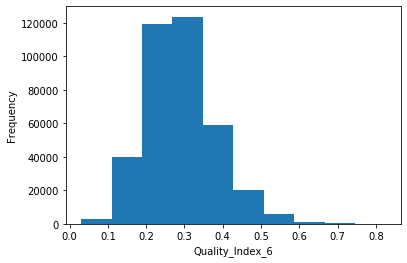

In [15]:
plt.hist(df_merge_quality['quality_index_6'], density=False)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('Quality_Index_6');

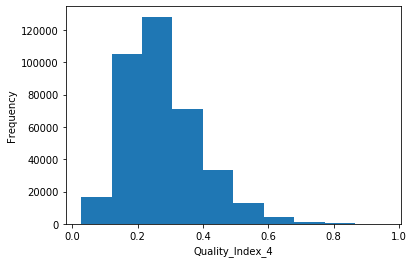

In [16]:
plt.hist(df_merge_quality['quality_index_4'], density=False)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('Quality_Index_4');

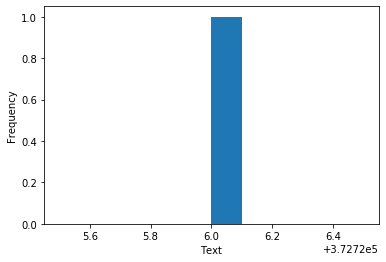

In [17]:
plt.hist(len(df_merge_quality['text']), density=False)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('Text');

In [20]:
conditions = [

    (df_merge_quality['quality_index_6'] < 0.3),
    (df_merge_quality['quality_index_6'] >= 0.3)
]

choices = ['0', '1']

In [21]:
import numpy as np
df_merge_quality['quality_rank'] = np.select(condlist=conditions, choicelist=choices)

/home/nobu_yamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df_merge_quality

,publication_number,application_number,text,filing_date,new_appl_nbr,appln_id,app_nbr,filing,tech_field,many_field,...,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,breakthrough_flg,quality_rank
0,EP-2493772-A1,EP-10773469-A,This invention pertains to a U-board split cas...,20101020,EP20100773469,328773105,EP20100773469,2010,25.0,0,...,NaN,NaN,NaN,0.602041,0.000000,4.0,0.396296,0.393637,0,1
4,EP-2813266-A2,EP-14172995-A,A fire suppression system (20) includes a cont...,20100825,EP20140172995,419197262,EP20140172995,2010,24.0,0,...,NaN,NaN,0.104938,0.887755,0.571429,9.0,0.420142,0.298506,0,0
5,EP-2255683-B1,EP-10163204-A,The device has an application device (47) for ...,20100519,EP20100163204,315607513,EP20100163204,2010,34.0,0,...,NaN,NaN,NaN,0.642361,0.416667,9.0,0.278788,0.367996,0,1
6,EP-2262981-B1,EP-10711585-A,The invention relates to a bimetallic valve fo...,20100329,EP20100711585,298884917,EP20100711585,2010,27.0,0,...,NaN,NaN,NaN,0.842951,0.675676,7.0,0.300938,0.450909,0,1
7,EP-2462850-B1,EP-10194739-A,The present invention concerns a beverage prep...,20101213,EP20100194739,329540694,EP20100194739,2010,33.0,0,...,NaN,NaN,0.000000,0.668639,0.461538,9.0,0.273246,0.367701,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843915,EP-2952147-A1,EP-15170632-A,"In some embodiments, a debridement tool (124) ...",20150604,EP20150170632,440974359,EP20150170632,2015,13.0,0,...,NaN,NaN,NaN,0.894174,0.758621,3.0,0.236467,0.302581,0,1
843916,EP-3040395-A1,EP-15198385-A,The present invention discloses an novel organ...,20151208,EP20150198385,447194132,EP20150198385,2015,14.0,1,...,NaN,NaN,NaN,0.838542,0.125000,3.0,0.188095,0.253368,0,0
843918,EP-3121161-A1,EP-15178054-A,The invention relates to an improved method fo...,20150723,EP20150178054,442595431,EP20150178054,2015,14.0,0,...,NaN,NaN,NaN,0.884898,0.514286,3.0,0.184524,0.210907,0,0
843919,EP-3159891-A1,EP-15190987-A,An active road-noise control system and method...,20151022,EP20150190987,445551961,EP20150190987,2015,34.0,0,...,NaN,NaN,NaN,0.833792,0.636364,3.0,0.270879,0.310780,0,1


### create a model

In [23]:
import numpy as np
import pandas as pd
import pickle as cPickle
from collections import defaultdict
import re

from bs4 import BeautifulSoup

import sys
import os
import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed
from keras.models import Model

from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers

Using TensorFlow backend.


In [24]:
MAX_SENT_LENGTH = 30
MAX_SENTS = 3
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [25]:
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub(r"\\", "", string)    
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()

In [50]:
data_train = df_merge_quality.sample(frac=1)[:20000]

In [51]:
print(data_train.shape)

(20000, 31)


In [52]:
data_train['breakthrough_flg'].value_counts()

0    19945
1       55
Name: breakthrough_flg, dtype: int64

In [53]:
19945/20000

0.99725

In [54]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/nobu_yamaguchi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
from nltk import tokenize

abstracts = []
labels = []
texts = []

for idx in range(data_train.text.shape[0]):

    text = clean_str(str(data_train.iloc[idx]['text']))
    texts.append(text)
    sentences = tokenize.sent_tokenize(text)
    abstracts.append(sentences)
    labels.append(data_train.iloc[idx]['breakthrough_flg'])

In [56]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
data = np.zeros((len(texts), MAX_SENTS, MAX_SENT_LENGTH), dtype='int32')

In [57]:
data.shape

(20000, 3, 30)

In [58]:
for i, sentences in enumerate(abstracts):
    for j, sent in enumerate(sentences):
        if j < MAX_SENTS:
            wordTokens = text_to_word_sequence(sent)
            k = 0
            for _, word in enumerate(wordTokens):
            #for word in wordTokens:
                if word in tokenizer.word_index.keys():
                    if (k < MAX_SENT_LENGTH) and (tokenizer.word_index[word] < MAX_NB_WORDS):
                        data[i, j, k] = tokenizer.word_index[word]
                        k = k + 1

In [59]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 34135 unique tokens.


In [60]:
labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (20000, 3, 30)
Shape of label tensor: (20000, 2)


In [61]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

In [62]:
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

In [63]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [77]:
type(y_val)

numpy.ndarray

In [80]:
np.unique(y_val, return_counts=True)

(array([0., 1.], dtype=float32), array([4000, 4000]))

In [64]:
print('Number of positive and negative reviews in traing and validation set')
print(y_train.sum(axis=0))
print(y_val.sum(axis=0))

Number of positive and negative reviews in traing and validation set
[15953.    47.]
[3992.    8.]


In [81]:
3992/4000

0.998

In [65]:
# Standard python helper libraries.
import os, sys, re, json, time
import itertools, collections
from importlib import reload
from IPython.display import display

# NumPy and SciPy for matrix ops

import scipy.sparse


# Helper libraries
#from w266_common import utils, vocabulary, tf_embed_viz
#import glove_helper; reload(glove_helper)

#hands = glove_helper.Hands(ndim=100)  # 50, 100, 200, 300 dim are available

import zipfile
with zipfile.ZipFile("data/glove/glove.6B.zip", 'r') as zip_ref:
    zip_ref.extractall("data/glove")

In [66]:
GLOVE_DIR = "data/glove"
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [67]:
print('Total %s word vectors.' % len(embeddings_index))

Total 400000 word vectors.


embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [68]:
# building Hierachical Attention network
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SENT_LENGTH,
                            trainable=False)

In [69]:
class AttLayer(Layer):
    def __init__(self, attention_dim):
        self.init = initializers.get('normal')
        self.supports_masking = True
        self.attention_dim = attention_dim
        super(AttLayer, self).__init__()

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)), name='W')
        self.b = K.variable(self.init((self.attention_dim, )), name='b')
        self.u = K.variable(self.init((self.attention_dim, 1)), name='u')
        self.trainable_weights = [self.W, self.b, self.u]
        super(AttLayer, self).build(input_shape)

    def compute_mask(self, inputs, mask=None):
        return mask

    def call(self, x, mask=None):
        # size of x :[batch_size, sel_len, attention_dim]
        # size of u :[batch_size, attention_dim]
        # uit = tanh(xW+b)
 
        uit = K.tanh(K.bias_add(K.dot(x, self.W), self.b)) #

        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)

        ait = K.exp(ait)


        #if mask is not None:
        #    # Cast the mask to floatX to avoid float64 upcasting in theano
        #    print('mask')
        #    ait *= K.cast(mask, K.floatx())

        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        ait = K.expand_dims(ait)
 
        weighted_input = x * ait
        output = K.sum(weighted_input, axis=1)

        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

class AttentionLayer(Layer):
    """
    Hierarchial Attention Layer as described by Hierarchical Attention Networks for Document Classification(2016)
    - Yang et. al.
    Source: https://www.cs.cmu.edu/~hovy/papers/16HLT-hierarchical-attention-networks.pdf
    Theano backend
    """
    def __init__(self,attention_dim=100,return_coefficients=False,**kwargs):
        # Initializer 
        self.supports_masking = True
        self.return_coefficients = return_coefficients
        self.init = initializers.get('glorot_uniform') # initializes values with uniform distribution
        self.attention_dim = attention_dim
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Builds all weights
        # W = Weight matrix, b = bias vector, u = context vector
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)),name='W')
        self.b = K.variable(self.init((self.attention_dim, )),name='b')
        self.u = K.variable(self.init((self.attention_dim, 1)),name='u')
        self.trainable_weights = [self.W, self.b, self.u]

        super(AttentionLayer, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, hit, mask=None):
        # Here, the actual calculation is done
        uit = K.bias_add(K.dot(hit, self.W),self.b)
        uit = K.tanh(uit)
        
        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)
        ait = K.exp(ait)
        
        if mask is not None:
            ait *= K.cast(mask, K.floatx())

        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = hit * ait
        
        if self.return_coefficients:
            return [K.sum(weighted_input, axis=1), ait]
        else:
            return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        if self.return_coefficients:
            return [(input_shape[0], input_shape[-1]), (input_shape[0], input_shape[-1], 1)]
        else:
            return input_shape[0], input_shape[-1]

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x,mask=None):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        print(at)
        output=x*at
        print(output)
        print(K.sum(output,axis=1))
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [70]:
sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sentence_input)
l_lstm = Bidirectional(GRU(100, return_sequences=True))(embedded_sequences)
l_att = AttLayer(100)(l_lstm)
sentEncoder = Model(sentence_input, l_att)

tracking <tf.Variable 'att_layer_1/W:0' shape=(200, 100) dtype=float32> W
tracking <tf.Variable 'att_layer_1/b:0' shape=(100,) dtype=float32> b
tracking <tf.Variable 'att_layer_1/u:0' shape=(100, 1) dtype=float32> u


In [71]:
abstract_input = Input(shape=(MAX_SENTS, MAX_SENT_LENGTH), dtype='int32')
abstract_encoder = TimeDistributed(sentEncoder)(abstract_input)
l_lstm_sent = Bidirectional(GRU(30, return_sequences=True))(abstract_encoder)

In [54]:
abstract_input.shape

TensorShape([None, 3, 30])

In [55]:
abstract_encoder.shape

TensorShape([None, 3, 200])

In [56]:
l_lstm_sent.shape

TensorShape([None, 3, 60])

In [72]:
#l_att_sent = AttLayer(100)(l_lstm_sent)
l_att_sent = AttLayer(100)(l_lstm_sent)

tracking <tf.Variable 'att_layer_2/W:0' shape=(60, 100) dtype=float32> W
tracking <tf.Variable 'att_layer_2/b:0' shape=(100,) dtype=float32> b
tracking <tf.Variable 'att_layer_2/u:0' shape=(100, 1) dtype=float32> u


In [73]:
l_att_dense = Dense(100, activation='relu')(l_att_sent)
l_att_dense = Dense(100, activation='relu')(l_att_dense)
#l_att_dense = Dense(100, activation='relu')(l_att_dense)
l_att_sent_drop = Dropout(rate=0.4)(l_att_dense)
preds = Dense(2, activation='sigmoid')(l_att_sent_drop)
model = Model(abstract_input, preds)

In [74]:
preds.shape

TensorShape([None, 2])

In [75]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [76]:
print("model fitting - Hierachical attention network 0.5")
model.fit(x_train, y_train, validation_data=(x_val, y_val),
          nb_epoch=5, batch_size=50)

model fitting - Hierachical attention network 0.5


/home/nobu_yamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 16000 samples, validate on 4000 samples
Epoch 1/5
16000/16000 [==============================] - 44s 3ms/step - loss: 0.0373 - acc: 0.9935 - val_loss: 0.0145 - val_acc: 0.9980
Epoch 2/5
16000/16000 [==============================] - 39s 2ms/step - loss: 0.0231 - acc: 0.9971 - val_loss: 0.0145 - val_acc: 0.9980
Epoch 3/5
16000/16000 [==============================] - 38s 2ms/step - loss: 0.0221 - acc: 0.9971 - val_loss: 0.0146 - val_acc: 0.9980
Epoch 4/5
16000/16000 [==============================] - 39s 2ms/step - loss: 0.0222 - acc: 0.9971 - val_loss: 0.0150 - val_acc: 0.9980
Epoch 5/5
16000/16000 [==============================] - 38s 2ms/step - loss: 0.0227 - acc: 0.9971 - val_loss: 0.0157 - val_acc: 0.9980


In [113]:
pred = model.predict(x_val)
pred_output = []

for cnt in range(4000):
    if pred[cnt][0] > pred[cnt][1]: 
        pred_output.append(0)
    else:
        pred_output.append(1)

[i for i in pred_output if pred_output[i] != 0]

[]

In [112]:
[i for i in pred_output if pred_output[i] != 0]

[]

In [ ]:
indices = [i for i in range(len(pred_output)) if pred_output[i] != y_val[i]]
subset_of_wrongly_predicted = [x_val[i] for i in indices ]

In [96]:
print(pred[0][0])

0.9948673


In [105]:
len(indices)

4000

In [90]:
print(subset_of_wrongly_predicted)

[array([[   1,   51,   25,   35,    5,    2,   22,    9,  230,    1, 3103,
         354,    3,    8, 3149,  281,  517, 3593,  879,   23,   31,    2,
         190,    9,    1, 3593,    1,  879,   33,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]], dtype=int32), array([[ 2326,   903,   124,   443,    30,     2,    10,    18,    26,
           50,   578,     3,   459,    20,   125,    50,     5,   125,
           60,  1383,  5278,   150,    10,    18,    73,   107,   578,
            0,     0,     0],
       [    3,     2,  2340,  1365,    33,     2,  7564,   572,     3,
           77,    90,    50,   612,  1286,     4,   125

In [87]:
len(y_val)

4000

In [81]:
print("model fitting - Hierachical attention network - 0.4")
model.fit(x_train, y_train, validation_data=(x_val, y_val),
          nb_epoch=5, batch_size=50)

model fitting - Hierachical attention network - 0.4


/home/nobu_yamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 25s 6ms/step - loss: 0.6667 - acc: 0.5903 - val_loss: 0.6711 - val_acc: 0.5930
Epoch 2/5
4000/4000 [==============================] - 21s 5ms/step - loss: 0.6528 - acc: 0.6215 - val_loss: 0.6735 - val_acc: 0.5750
Epoch 3/5
4000/4000 [==============================] - 21s 5ms/step - loss: 0.6361 - acc: 0.6438 - val_loss: 0.6785 - val_acc: 0.5740
Epoch 4/5
4000/4000 [==============================] - 21s 5ms/step - loss: 0.6081 - acc: 0.6830 - val_loss: 0.7115 - val_acc: 0.5720
Epoch 5/5
4000/4000 [==============================] - 21s 5ms/step - loss: 0.5745 - acc: 0.7090 - val_loss: 0.7274 - val_acc: 0.5720


In [44]:
print("model fitting - Hierachical attention network  .3")
model.fit(x_train, y_train, validation_data=(x_val, y_val),
          nb_epoch=5, batch_size=50)

model fitting - Hierachical attention network  .3


/home/nobu_yamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 23s 6ms/step - loss: 0.6849 - acc: 0.5807 - val_loss: 0.6922 - val_acc: 0.5670
Epoch 2/5
4000/4000 [==============================] - 19s 5ms/step - loss: 0.6785 - acc: 0.5850 - val_loss: 0.6756 - val_acc: 0.5720
Epoch 3/5
4000/4000 [==============================] - 19s 5ms/step - loss: 0.6730 - acc: 0.5832 - val_loss: 0.6760 - val_acc: 0.5680
Epoch 4/5
4000/4000 [==============================] - 19s 5ms/step - loss: 0.6691 - acc: 0.5807 - val_loss: 0.6627 - val_acc: 0.5810
Epoch 5/5
4000/4000 [==============================] - 19s 5ms/step - loss: 0.6627 - acc: 0.5918 - val_loss: 0.6655 - val_acc: 0.5760
